### ***Corporación Favorita Grocery Sales Forecasting***

##### In this case study, you will be predicting the unit sales for thousands of items sold at different Favorita stores located in Ecuador.

#### ***Business Problem*** - Corporación Favorita Retailer can basically face two of the following problems:


Stock-out - Stockouts generally refer to a product being unavailable for purchase at retail, as opposed to elsewhere in the supply chain. This may result in loss of sales.


Overstock - When referring to overstock merchandise in the form of consumer goods in a retail operation, the term refers to goods that have never been purchased by a customer but that are considered excessive stock from shelves and/or warehouses. Loss may be incured if the items are perishible. 

Accurate and timely sales prediction is essential part of business
planning with a direct impact to stock management and profitability. In food sales, the stock includes a large assortment of goods,
some require special storage conditions or are quickly perishable.

#### ***ML Formulating the Problem*** 

The main focus of machine learning is to provide algorithms that are trained to perform a task i.e. sales prediction in this case study.

This is Regression problem. 

In our case the variable which needs to be predicted i.e. ‘unit sales’ is continuous in nature makes it a regression problem.

#### ***Performance Metric***

In my business problem, the business use case is such that under prediction is not acceptable but over prediction is acceptable. 

The performance metric designed to penalize a model more for under prediction rather than over prediction is ***RMSLE***

#### ***RMSLE : Root Mean Squared Log Error***

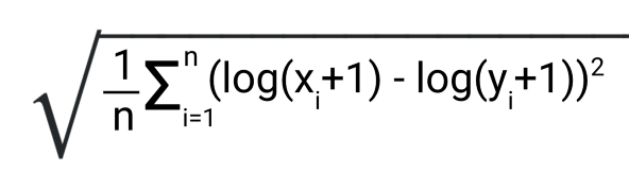

#### ***Why RMSLE***

RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.

Robustness to the effect of the outliers

Relative Error

#### ***Baseline Approach***

1. Predict item level average sales 

2. Predict item average sales at each store level

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dask.dataframe as dd
import seaborn as sns
import random
import time

In [2]:
import tensorflow as tf

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

##### Code below shows how to reduce the size of the properties dataset by selecting smaller datatypes.

In [4]:
#Code Source : https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [5]:
print('-' * 80)
print('train')
train_df = import_data('/content/drive/MyDrive/CaseStudy1/train.csv')

print('-' * 80)
print('test')
test_df = import_data('/content/drive/MyDrive/CaseStudy1/test.csv')

print('-' * 80)
print('Store')
store_df = import_data('/content/drive/MyDrive/CaseStudy1/stores.csv')

print('-' * 80)
print('transaction')
transaction_df = import_data('/content/drive/MyDrive/CaseStudy1/transactions.csv')

print('-' * 80)
print('Oil')
oil_df = import_data('/content/drive/MyDrive/CaseStudy1/oil.csv')

print('-' * 80)
print('Items')
items_df = import_data('/content/drive/MyDrive/CaseStudy1/items.csv')

print('-' * 80)
print('holidays_events')
holidays_events_df = import_data('/content/drive/MyDrive/CaseStudy1/holidays_events.csv')

--------------------------------------------------------------------------------
train


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Memory usage of dataframe is 5744.80 MB
Memory usage after optimization is: 1915.02 MB
Decreased by 66.7%
--------------------------------------------------------------------------------
test
Memory usage of dataframe is 106.07 MB
Memory usage after optimization is: 38.57 MB
Decreased by 63.6%
--------------------------------------------------------------------------------
Store
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 4.6%
--------------------------------------------------------------------------------
transaction
Memory usage of dataframe is 1.91 MB
Memory usage after optimization is: 0.49 MB
Decreased by 74.4%
--------------------------------------------------------------------------------
Oil
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.05 MB
Decreased by -184.0%
--------------------------------------------------------------------------------
Items
Memory usage of dataframe is 0.13 MB
Memory usage af

In [6]:
print('Train Shape is :', train_df.shape)
print('Test Shape is :', test_df.shape)
print('Store Shape is :', store_df.shape)
print('Transaction Shape is :', transaction_df.shape)
print('Oil Shape is :', oil_df.shape)
print('Items Shape is :', items_df.shape)
print('Holiday Shape is :', holidays_events_df.shape)

Train Shape is : (125497040, 6)
Test Shape is : (3370464, 5)
Store Shape is : (54, 5)
Transaction Shape is : (83488, 3)
Oil Shape is : (1218, 2)
Items Shape is : (4100, 4)
Holiday Shape is : (350, 6)


In [ ]:
print('-' * 80)
print('train')
print(train_df.info())
print('-' * 80)
print('test')
print(test_df.info())
print('-' * 80)
print('Store')
print(store_df.info())
print('-' * 80)
print('transaction')
print(transaction_df.info())
print('-' * 80)
print('Oil')
print(oil_df.info())
print('-' * 80)
print('Items')
print(items_df.info())
print('-' * 80)
print('holidays_events')
print(holidays_events_df.info())

--------------------------------------------------------------------------------
train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         category
 2   store_nbr    int8    
 3   item_nbr     int32   
 4   unit_sales   float32 
 5   onpromotion  category
dtypes: category(2), float32(1), int32(2), int8(1)
memory usage: 1.9 GB
None
--------------------------------------------------------------------------------
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         category
 2   store_nbr    int8    
 3   item_nbr     int32   
 4   onpromotion  float16 
dtypes: category(1), float16(1), int32(2), int8(1)
memory usage: 38.6 MB
None
---------------------------------------

In [ ]:
train_df.head(2)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN


In [ ]:
test_df.head(2)

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,0.0
1,125497041,2017-08-16,1,99197,0.0


In [ ]:
store_df.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [ ]:
transaction_df.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [ ]:
oil_df.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.125


In [ ]:
holidays_events_df.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,0.0
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,0.0


In [ ]:
items_df.head(2)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0


#### Merging all the datasets with Test Data

In [ ]:
test_merge_1 = pd.merge(test_df,store_df,on='store_nbr',how='left')
test_merge_2 = pd.merge(test_merge_1,oil_df,on='date',how='left')
test_merge_3 = pd.merge(test_merge_2,holidays_events_df,on='date',how='left')
test_merge_4 = pd.merge(test_merge_3,items_df,on='item_nbr',how='left')
test_final_df = pd.merge(test_merge_4,transaction_df,on=['date','store_nbr'],how='left')
test_final_df.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,family,class,perishable,transactions
0,125497040,2017-08-16,1,96995,0.0,Quito,Pichincha,D,13,46.8125,NaN,NaN,NaN,NaN,NaN,GROCERY I,1093,0,NaN
1,125497041,2017-08-16,1,99197,0.0,Quito,Pichincha,D,13,46.8125,NaN,NaN,NaN,NaN,NaN,GROCERY I,1067,0,NaN
2,125497042,2017-08-16,1,103501,0.0,Quito,Pichincha,D,13,46.8125,NaN,NaN,NaN,NaN,NaN,CLEANING,3008,0,NaN
3,125497043,2017-08-16,1,103520,0.0,Quito,Pichincha,D,13,46.8125,NaN,NaN,NaN,NaN,NaN,GROCERY I,1028,0,NaN
4,125497044,2017-08-16,1,103665,0.0,Quito,Pichincha,D,13,46.8125,NaN,NaN,NaN,NaN,NaN,BREAD/BAKERY,2712,1,NaN


In [ ]:
#Saving the final created test df as csv for further processing
test_final_df.to_csv('/content/drive/MyDrive/CaseStudy1/test_final_df_V1.csv',index = False)

#### ***EDA on Train Data***

In [ ]:
train_df.shape

(125497040, 6)

In [ ]:
train_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [ ]:
#Counting the no of NULL Values in each column
train_df.isnull().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [ ]:
Missing_Value_percentage = train_df.isnull().sum() * 100 / len(train_df)
print(Missing_Value_percentage)

id              0.000000
date            0.000000
store_nbr       0.000000
item_nbr        0.000000
unit_sales      0.000000
onpromotion    17.257499
dtype: float64


###### Adding Year, Month & Day of the week as additional Features

In [7]:
train_df['date'] = pd.to_datetime(train_df['date'])


In [8]:
train_df['year'] = np.uint16(train_df['date'].dt.year)


In [10]:
train_df['month'] = np.uint16(train_df['date'].dt.month)


In [11]:
train_df['day_of_week'] = np.uint8(train_df['date'].dt.dayofweek)

In [12]:
train_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day_of_week
0,0,2013-01-01,25,103665,7.0,NaN,2013,1,1
1,1,2013-01-01,25,105574,1.0,NaN,2013,1,1
2,2,2013-01-01,25,105575,2.0,NaN,2013,1,1
3,3,2013-01-01,25,108079,1.0,NaN,2013,1,1
4,4,2013-01-01,25,108701,1.0,NaN,2013,1,1


In [ ]:
sns.set_theme(style="darkgrid")

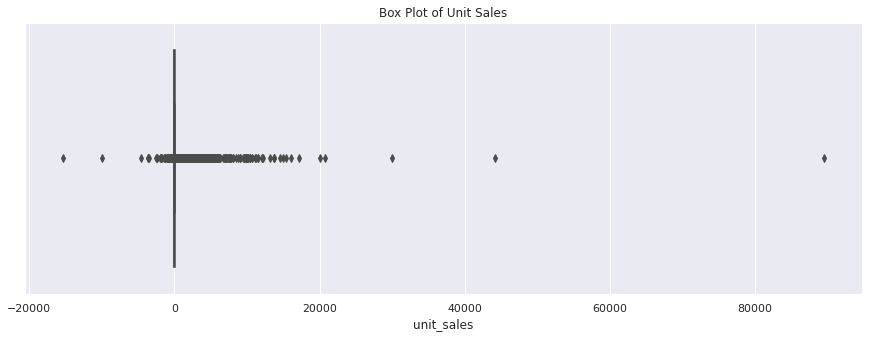

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x=train_df["unit_sales"])
plt.title('Box Plot of Unit Sales')
plt.show()

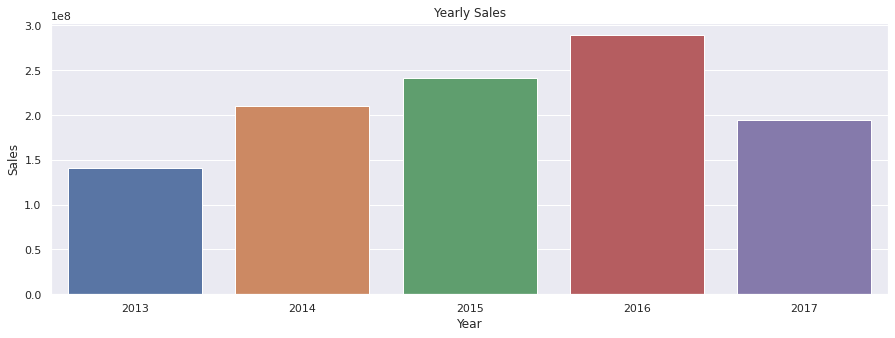

In [ ]:
#Code Ref : https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
plt.figure(figsize=(15,5))
yearly_unit_sales = train_df.groupby(['year'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=yearly_unit_sales, x=yearly_unit_sales.year, y=yearly_unit_sales.unit_sales)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

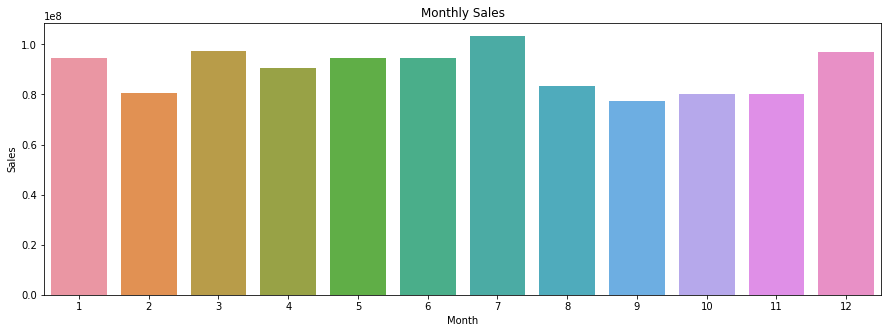

In [ ]:
plt.figure(figsize=(15,5))
monthly_unit_sales = train_df.groupby(['month'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=monthly_unit_sales, x=monthly_unit_sales.month, y=monthly_unit_sales.unit_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

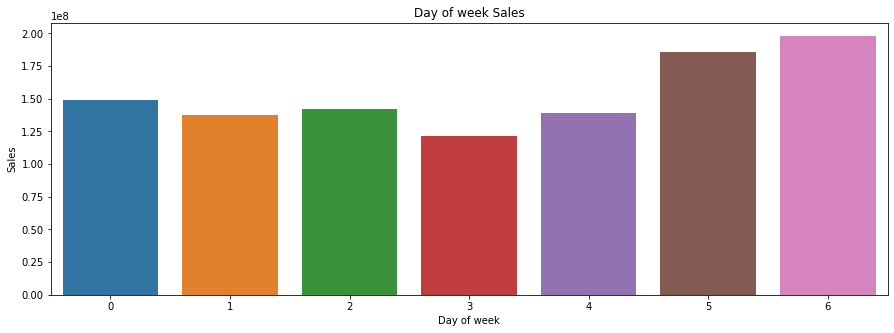

In [13]:
plt.figure(figsize=(15,5))
day_of_week_unit_sales = train_df.groupby(['day_of_week'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=day_of_week_unit_sales, x=day_of_week_unit_sales.day_of_week, y=day_of_week_unit_sales.unit_sales)
plt.title('Day of week Sales')
plt.xlabel('Day of week')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


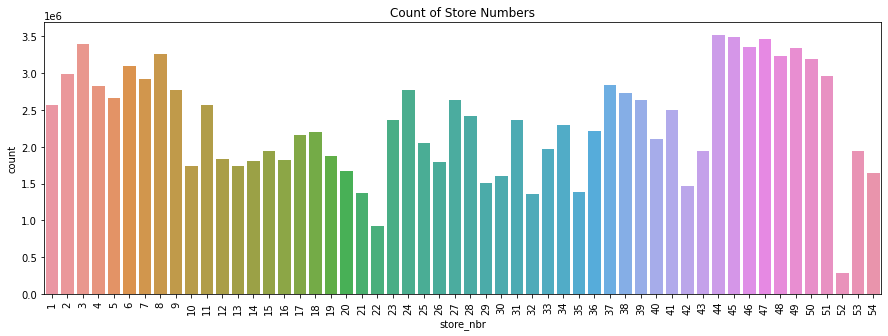

In [8]:
  plt.figure(figsize=(15,5))
  sns.countplot(train_df['store_nbr'])
  plt.title('Count of Store Numbers')
  plt.xticks(rotation = 'vertical')
  plt.show()

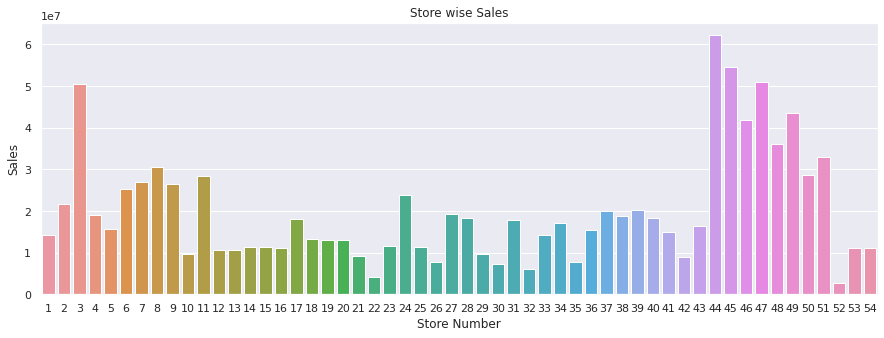

In [ ]:
plt.figure(figsize=(15,5))
store_nbr_unit_sales = train_df.groupby(['store_nbr'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=store_nbr_unit_sales, x=store_nbr_unit_sales.store_nbr, y=store_nbr_unit_sales.unit_sales)
plt.title('Store wise Sales')
plt.xlabel('Store Number')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

In [14]:
df = train_df[train_df['onpromotion'].notna()]

In [15]:
df.shape

(103839389, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839389 entries, 21657651 to 125497039
Data columns (total 9 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         category
 2   store_nbr    int8    
 3   item_nbr     int32   
 4   unit_sales   float32 
 5   onpromotion  int64   
 6   year         uint16  
 7   month        uint16  
 8   day_of_week  uint8   
dtypes: category(1), float32(1), int32(2), int64(1), int8(1), uint16(2), uint8(1)
memory usage: 3.5 GB


In [23]:
df['onpromotion'] = df['onpromotion'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


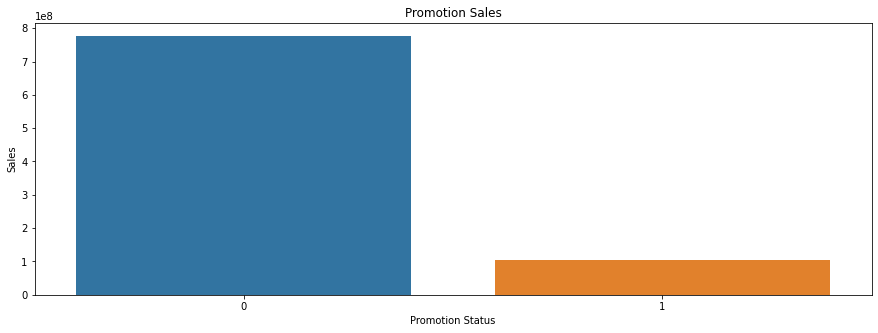

In [25]:
plt.figure(figsize=(15,5))
onpromotion_unit_sales = df.groupby(['onpromotion'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=onpromotion_unit_sales, x=onpromotion_unit_sales.onpromotion, y=onpromotion_unit_sales.unit_sales)
plt.title('Promotion Sales')
plt.xlabel('Promotion Status')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

### ***Observations from Train Dataset***

1.  17% of onpromotion values are missing

2. Unit Sales has outliers as shown in box plot 

3. 2016 has the highest unit sales and 2017 is the lowest

4. 2017 has the lowest sales as data is avaliable until August

5. July & December has the highest unit sales compared to other months 

6. Saturday and Sunday has highest unit sales compared to other days

7. Non Promotion sales are high compared to on-promotion sales

8. Store Number 44 has the highest sales and also has highest number of stores 

As we have 125M datapoints & 2016 has the highest sales filtering the data for merging with other datasets and further analysis

In [30]:
train_df['year'].value_counts()

2016    35229871
2015    27864644
2017    23808261
2014    22271602
2013    16322662
Name: year, dtype: int64

##### Merging 2016 data with transaction, items & stores

In [28]:
train_2016 = train_df[train_df['year']==2016]

In [31]:
train_2016 = pd.merge(train_2016,transaction_df,on=['date','store_nbr'],how='left')

In [32]:
train_2016 = pd.merge(train_2016,items_df,on='item_nbr',how='left')

In [33]:
train_2016 = pd.merge(train_2016,store_df,on='store_nbr',how='left')

#### ***EDA on Merged Data***

In [34]:
train_merge_3.shape

(35229871, 17)

In [35]:
train_merge_3.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day_of_week,transactions,family,class,perishable,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,False,2016,1,4,NaN,GROCERY I,1045,0,Salinas,Santa Elena,D,1
1,66458909,2016-01-01,25,105575,9.0,False,2016,1,4,NaN,GROCERY I,1045,0,Salinas,Santa Elena,D,1
2,66458910,2016-01-01,25,105857,3.0,False,2016,1,4,NaN,GROCERY I,1092,0,Salinas,Santa Elena,D,1
3,66458911,2016-01-01,25,108634,3.0,False,2016,1,4,NaN,GROCERY I,1075,0,Salinas,Santa Elena,D,1
4,66458912,2016-01-01,25,108701,2.0,True,2016,1,4,NaN,DELI,2644,1,Salinas,Santa Elena,D,1


In [36]:
train_merge_3.isnull().sum()

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
year                   0
month                  0
day_of_week            0
transactions    35229871
family                 0
class                  0
perishable             0
city                   0
state                  0
type                   0
cluster                0
dtype: int64

In [37]:
#Dropping the transactions column as all the values were Null
train_merge_3.drop(['transactions'], axis=1, inplace=True)

In [38]:
train_merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229871 entries, 0 to 35229870
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int32         
 1   date         datetime64[ns]
 2   store_nbr    int8          
 3   item_nbr     int32         
 4   unit_sales   float32       
 5   onpromotion  category      
 6   year         uint16        
 7   month        uint16        
 8   day_of_week  uint8         
 9   family       category      
 10  class        int16         
 11  perishable   int8          
 12  city         category      
 13  state        category      
 14  type         category      
 15  cluster      int8          
dtypes: category(5), datetime64[ns](1), float32(1), int16(1), int32(2), int8(3), uint16(2), uint8(1)
memory usage: 1.4 GB


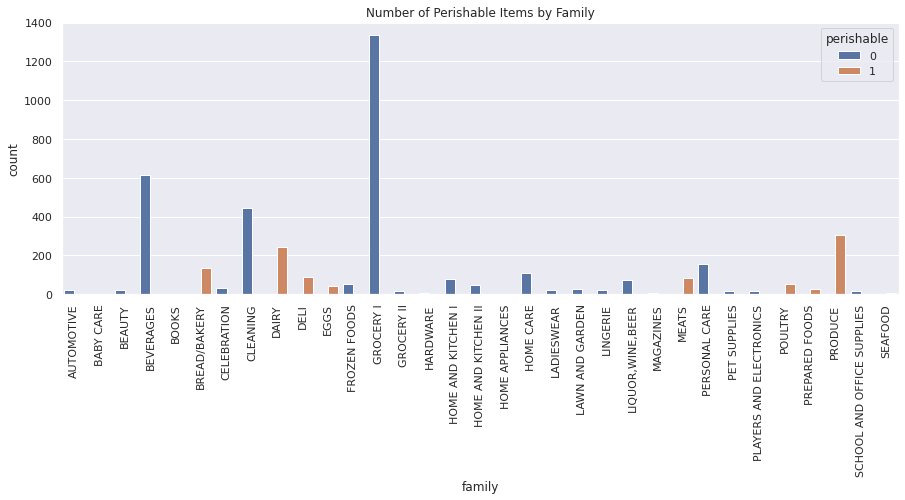

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = items_df, x='family', hue='perishable')
plt.title('Number of Perishable Items by Family')
plt.xticks(rotation = 'vertical')
plt.show()

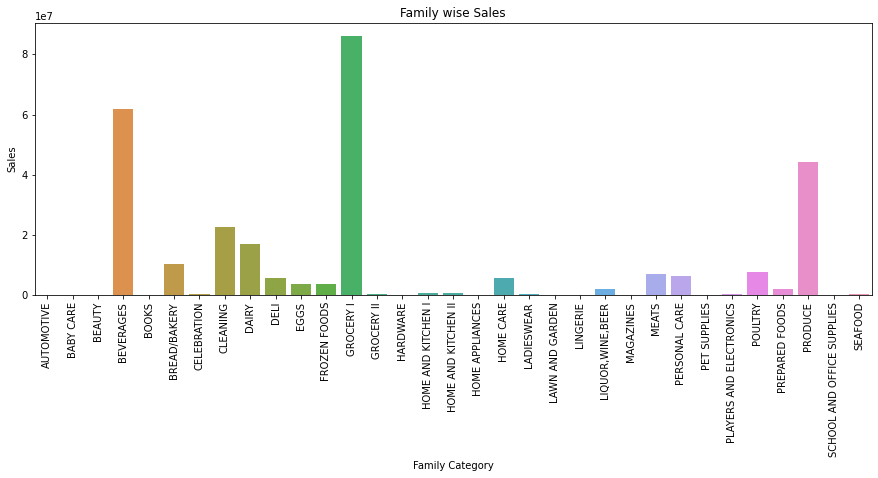

In [41]:
plt.figure(figsize=(15,5))
family_unit_sales = train_merge_3.groupby(['family'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=family_unit_sales, x=family_unit_sales.family, y='unit_sales')
plt.title('Family wise Sales')
plt.xlabel('Family Category')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.show()

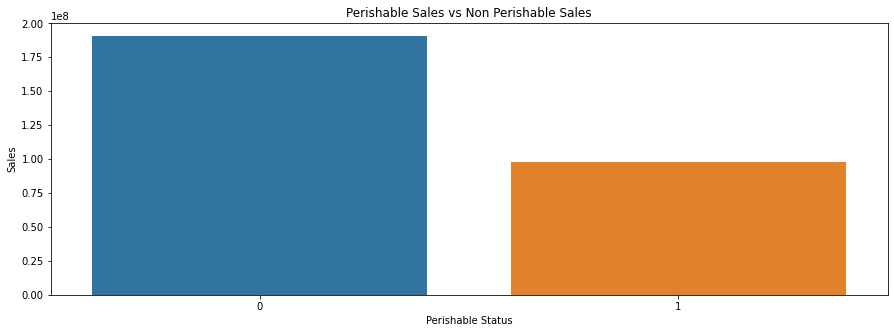

In [47]:
plt.figure(figsize=(15,5))
perishable_unit_sales = train_merge_3.groupby(['perishable'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=perishable_unit_sales, x=perishable_unit_sales.perishable, y='unit_sales')
plt.title('Perishable Sales vs Non Perishable Sales')
plt.xlabel('Perishable Status')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

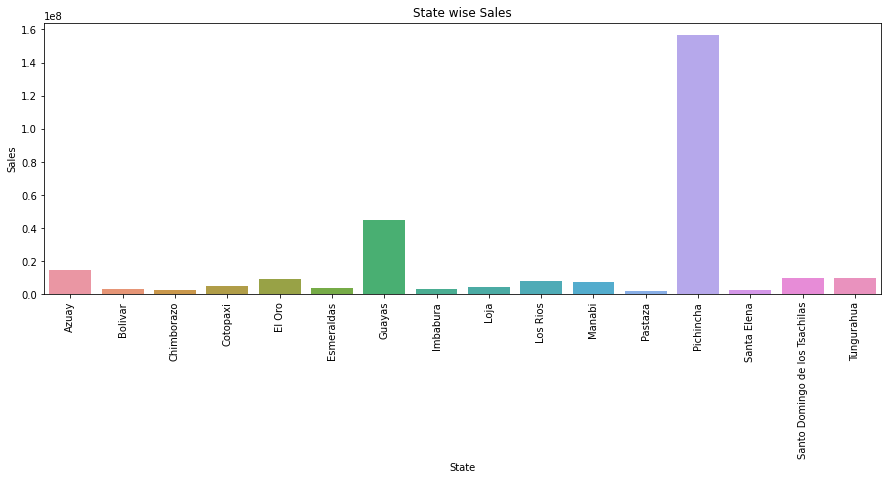

In [42]:
plt.figure(figsize=(15,5))
sate_unit_sales = train_merge_3.groupby(['state'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=sate_unit_sales, x=sate_unit_sales.state, y='unit_sales')
plt.title('State wise Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.show()

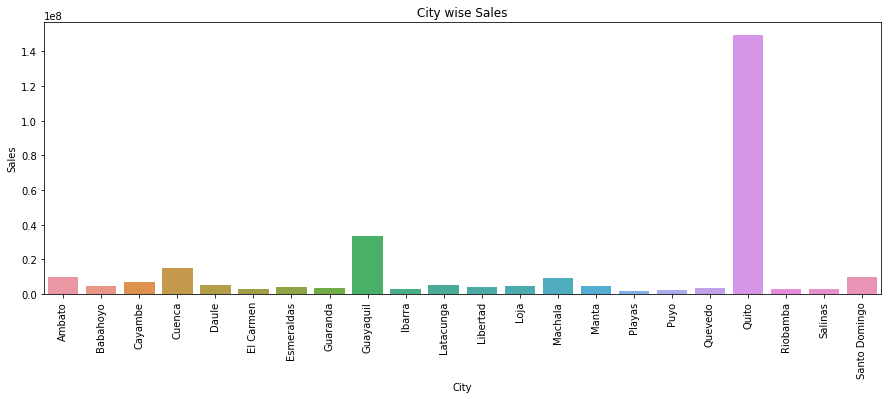

In [43]:
plt.figure(figsize=(15,5))
city_unit_sales = train_merge_3.groupby(['city'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=city_unit_sales, x=city_unit_sales.city, y='unit_sales')
plt.title('City wise Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.show()

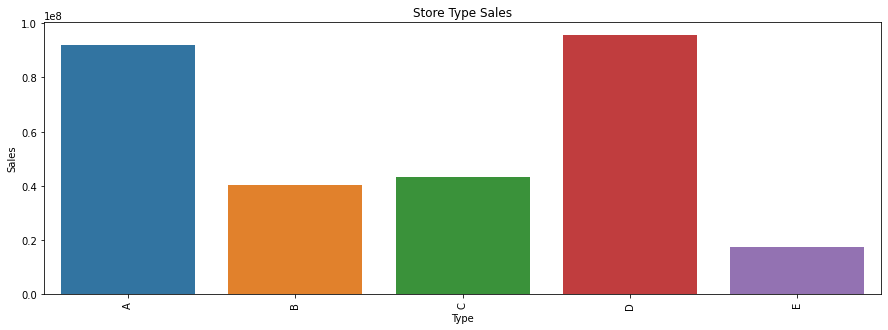

In [44]:
plt.figure(figsize=(15,5))
type_unit_sales = train_merge_3.groupby(['type'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=type_unit_sales, x=type_unit_sales.type, y='unit_sales')
plt.title('Store Type Sales')
plt.xlabel('Type')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.show()

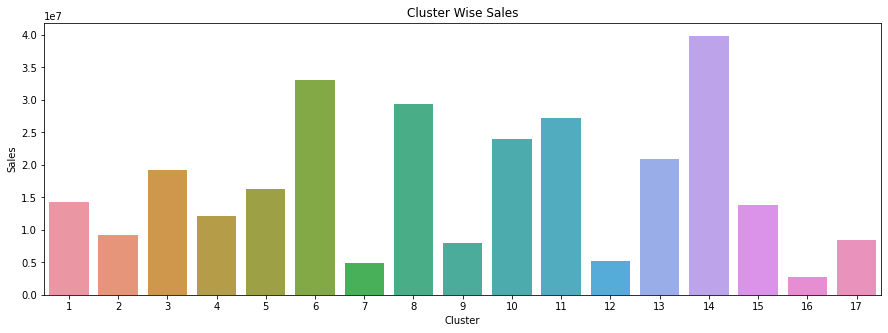

In [46]:
plt.figure(figsize=(15,5))
Cluster_unit_sales = train_merge_3.groupby(['cluster'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=Cluster_unit_sales, x=Cluster_unit_sales.cluster, y='unit_sales')
plt.title('Cluster Wise Sales')
plt.xlabel('Cluster')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

#### ***EDA on Holiday Data & Train Data***

In [7]:
holiday_train = pd.merge(train_df,holidays_events_df,on='date',how='left')

In [8]:
holiday_train.shape

(127970257, 11)

In [19]:
holiday_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127970257 entries, 0 to 127970256
Data columns (total 11 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         object  
 2   store_nbr    int8    
 3   item_nbr     int32   
 4   unit_sales   float32 
 5   onpromotion  category
 6   type         category
 7   locale       category
 8   locale_name  category
 9   description  category
 10  transferred  float16 
dtypes: category(5), float16(1), float32(1), int32(2), int8(1), object(1)
memory usage: 4.3+ GB


In [9]:
holiday_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,25,103665,7.0,NaN,Holiday,National,Ecuador,Primer dia del ano,0.0
1,1,2013-01-01,25,105574,1.0,NaN,Holiday,National,Ecuador,Primer dia del ano,0.0
2,2,2013-01-01,25,105575,2.0,NaN,Holiday,National,Ecuador,Primer dia del ano,0.0
3,3,2013-01-01,25,108079,1.0,NaN,Holiday,National,Ecuador,Primer dia del ano,0.0
4,4,2013-01-01,25,108701,1.0,NaN,Holiday,National,Ecuador,Primer dia del ano,0.0


In [10]:
holiday_train.isnull().sum()

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion     21887677
type           106142049
locale         106142049
locale_name    106142049
description    106142049
transferred    106142049
dtype: int64

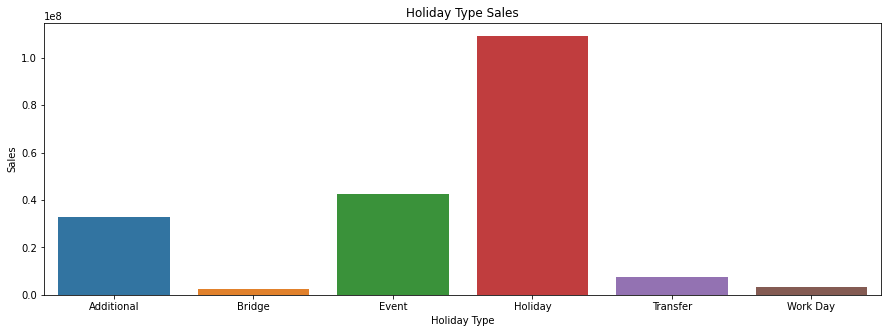

In [12]:
plt.figure(figsize=(15,5))
type_unit_sales = holiday_train.groupby(['type'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=type_unit_sales, x=type_unit_sales.type, y='unit_sales')
plt.title('Holiday Type Sales')
plt.xlabel('Holiday Type')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

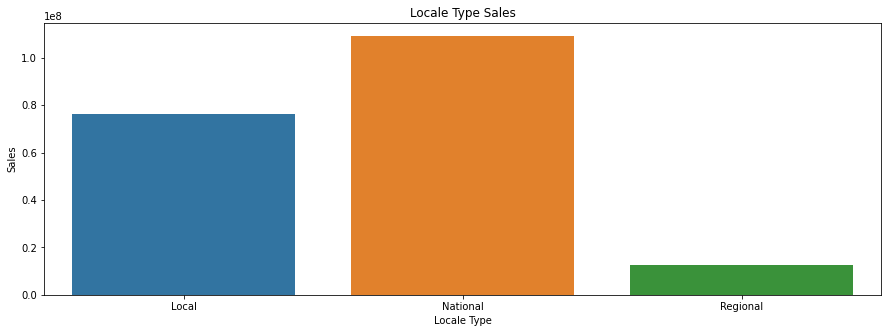

In [13]:
plt.figure(figsize=(15,5))
locale_unit_sales = holiday_train.groupby(['locale'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=locale_unit_sales, x=locale_unit_sales.locale, y='unit_sales')
plt.title('Locale Type Sales')
plt.xlabel('Locale Type')
plt.ylabel('Sales')
#plt.xticks(rotation = 'vertical')
plt.show()

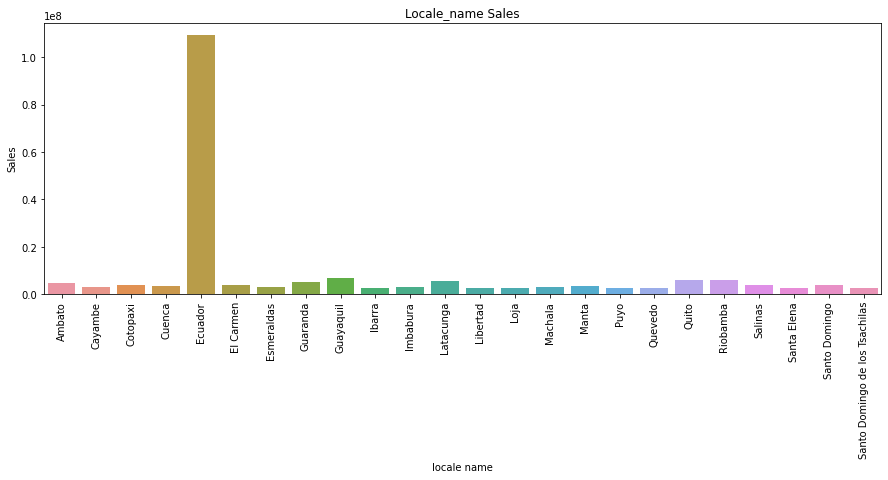

In [15]:
plt.figure(figsize=(15,5))
locale_unit_sales = holiday_train.groupby(['locale_name'], as_index= False).agg({'unit_sales':'sum'})
sns.barplot(data=locale_unit_sales, x=locale_unit_sales.locale_name, y='unit_sales')
plt.title('Locale_name Sales')
plt.xlabel('locale name')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.show()

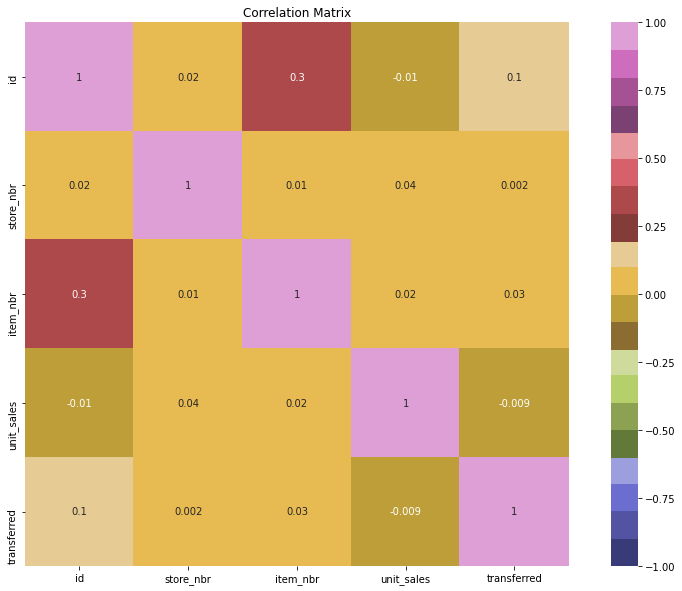

In [23]:
#Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(holiday_train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='tab20b')
plt.title('Correlation Matrix')
plt.show()

### ***Observations from Holiday Dataset***

1. Events happens at three different levels namely Local, Regional & National. National events are more compared to others followed by Local events 

2. Ecuador has the highest sales

3. Event Holiday sales are the highest

#### ***EDA on Oil Data***

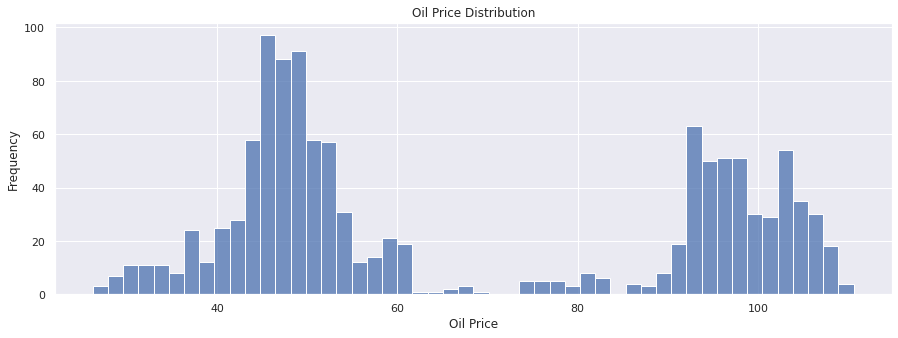

In [ ]:
fig,ax=plt.subplots(figsize=(15, 5))
#ax.set(yscale='log')
sns.histplot(oil_df['dcoilwtico'].values, bins=50)
plt.xlabel('Oil Price')
plt.ylabel('Frequency')
plt.title('Oil Price Distribution')
plt.show()

In [6]:
oil_train = pd.merge(train_df,oil_df,on='date',how='left')

In [25]:
oil_train.shape

(125497040, 7)

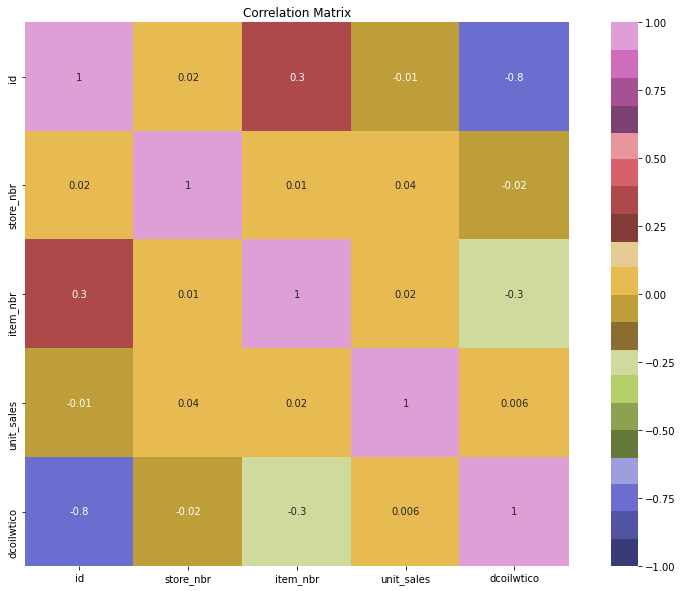

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(oil_train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='tab20b')
plt.title('Correlation Matrix')
plt.show()

### ***Observations from Oil Dataset***

1. Oil Price is bi-nomially distributed where one values ranges from 40-60 & other ranges from 90-110

2. There is no strong correalation between Unit sales & Oil Price

### ***Overall Observations***

1. 17% of onpromotion values are NULL

2. Unit Sales of items Non promotion are high

3. Events happens at three different levels namely Local, Regional & National. National events are more compared to others followed by Local events 

4. Ecuador has the highest sales

5. Event Holiday sales are the highest

6. Top 3 Item Family sold are **Poultry**, **Produce, Grocery I**

8. From Heat Map we can observe that Oil Price are negatively correlated & othere independant variables are not strongly correaled 

9. Oil Price is bi-nomially distributed where one values ranges from 40-60 & other ranges from 90-110

10. There is no strong correalation between Unit sales & Oil Price

11. 2016 has the highest unit sales and 2017 is the lowest

12. 2017 has the lowest sales as data is avaliable until August

13. July & December has the highest unit sales compared to other months 

14. Saturday and Sunday has highest unit sales compared to other days

Featuares like Year, Month, Day of week can be added to the model

#### ***Correlation*** 

1. Betweeen 2 Categorical Variable 

Spearman’s Correlation

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))


2. Betweeen 1 Categorical Variable & 1 Continous Variable

One-way ANOVA